In [ ]:
# text = '''
# 01/02/1999-12:32:51.2548 -> 25 -- 64
# 01/02/1999-12:32:52.2648 -> 25 -- 65
# 01/02/1999-12:32:53.2788 -> 25 -- 66
# 01/02/1999-12:32:54.348 -> 25 -- 64
# '''

: 

In [2]:
def format(text):
    import numpy as np, datetime as dt
    text2 = text.strip().split('\n')
    for i in range(len(text2)):
        text2[i] = text2[i].split(' -> ')
    text3 = []
    for row in text2:
        Row = [row[0]]
        Row.extend(row[1].split(' -- '))
        text3.append(Row)
    TODAY = dt.datetime.today().strftime('%d/%m/%Y-')
    a = dt.datetime.strptime(TODAY+text3[0][0],'%d/%m/%Y-%H:%M:%S.%f').timestamp()
    for i in range(len(text3)):
        text3[i][0] = dt.datetime.strptime(TODAY+text3[i][0],'%d/%m/%Y-%H:%M:%S.%f').timestamp() - a
        for j in range(len(text3[0])):
            text3[i][j] = float(text3[i][j])
    dados = np.array(text3)     
    return dados    

In [3]:
def plot(dados,name='dados.png'):
    import matplotlib.pyplot as plt
    from matplotlib import gridspec
    fig = plt.figure(figsize=(20, 20)) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4]) 
    plt.margins(0)
    ax0 = plt.subplot(gs[0])
    plt.box(False)
    ax0.plot(dados[:,0], dados[:,1])
    ax0.set_label('de')
    ax0.set_ylabel('Potência (%)')
    ax1 = plt.subplot(gs[1])
    plt.box(False)
    ax1.plot(dados[:,0], dados[:,2],'r')
    ax1.set_ylabel('Temperatura (°C)')
    ax1.set_xlabel('tempo (s)')
    fig.savefig(name,facecolor='white',bbox_inches='tight')
    return fig

# Teste 1, Termopar de Steve
hello

In [ ]:
#include <RBDdimmer.h>
#include "max6675.h"

int thermoDO = 6;
int thermoCS = 7;
int thermoCLK = 8;

dimmerLamp dimmer(12);
MAX6675 thermocouple(thermoCLK, thermoCS, thermoDO);

int outVal = 0;

void setup() {
  Serial.begin(9600);
  dimmer.begin(NORMAL_MODE, ON);
  delay(1000);
}

void loop() {
  outVal = map(analogRead(0), 0, 534, 0, 100);
  Serial.print(outVal); 
  Serial.print(" -- ");
  Serial.println(thermocouple.readCelsius());
  dimmer.setPower(outVal);
  delay(1000);
}

In [4]:
with open('teste1.txt','r') as f:
    text = f.read()

/tmp/ipykernel_22210/860896835.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(gs[0])


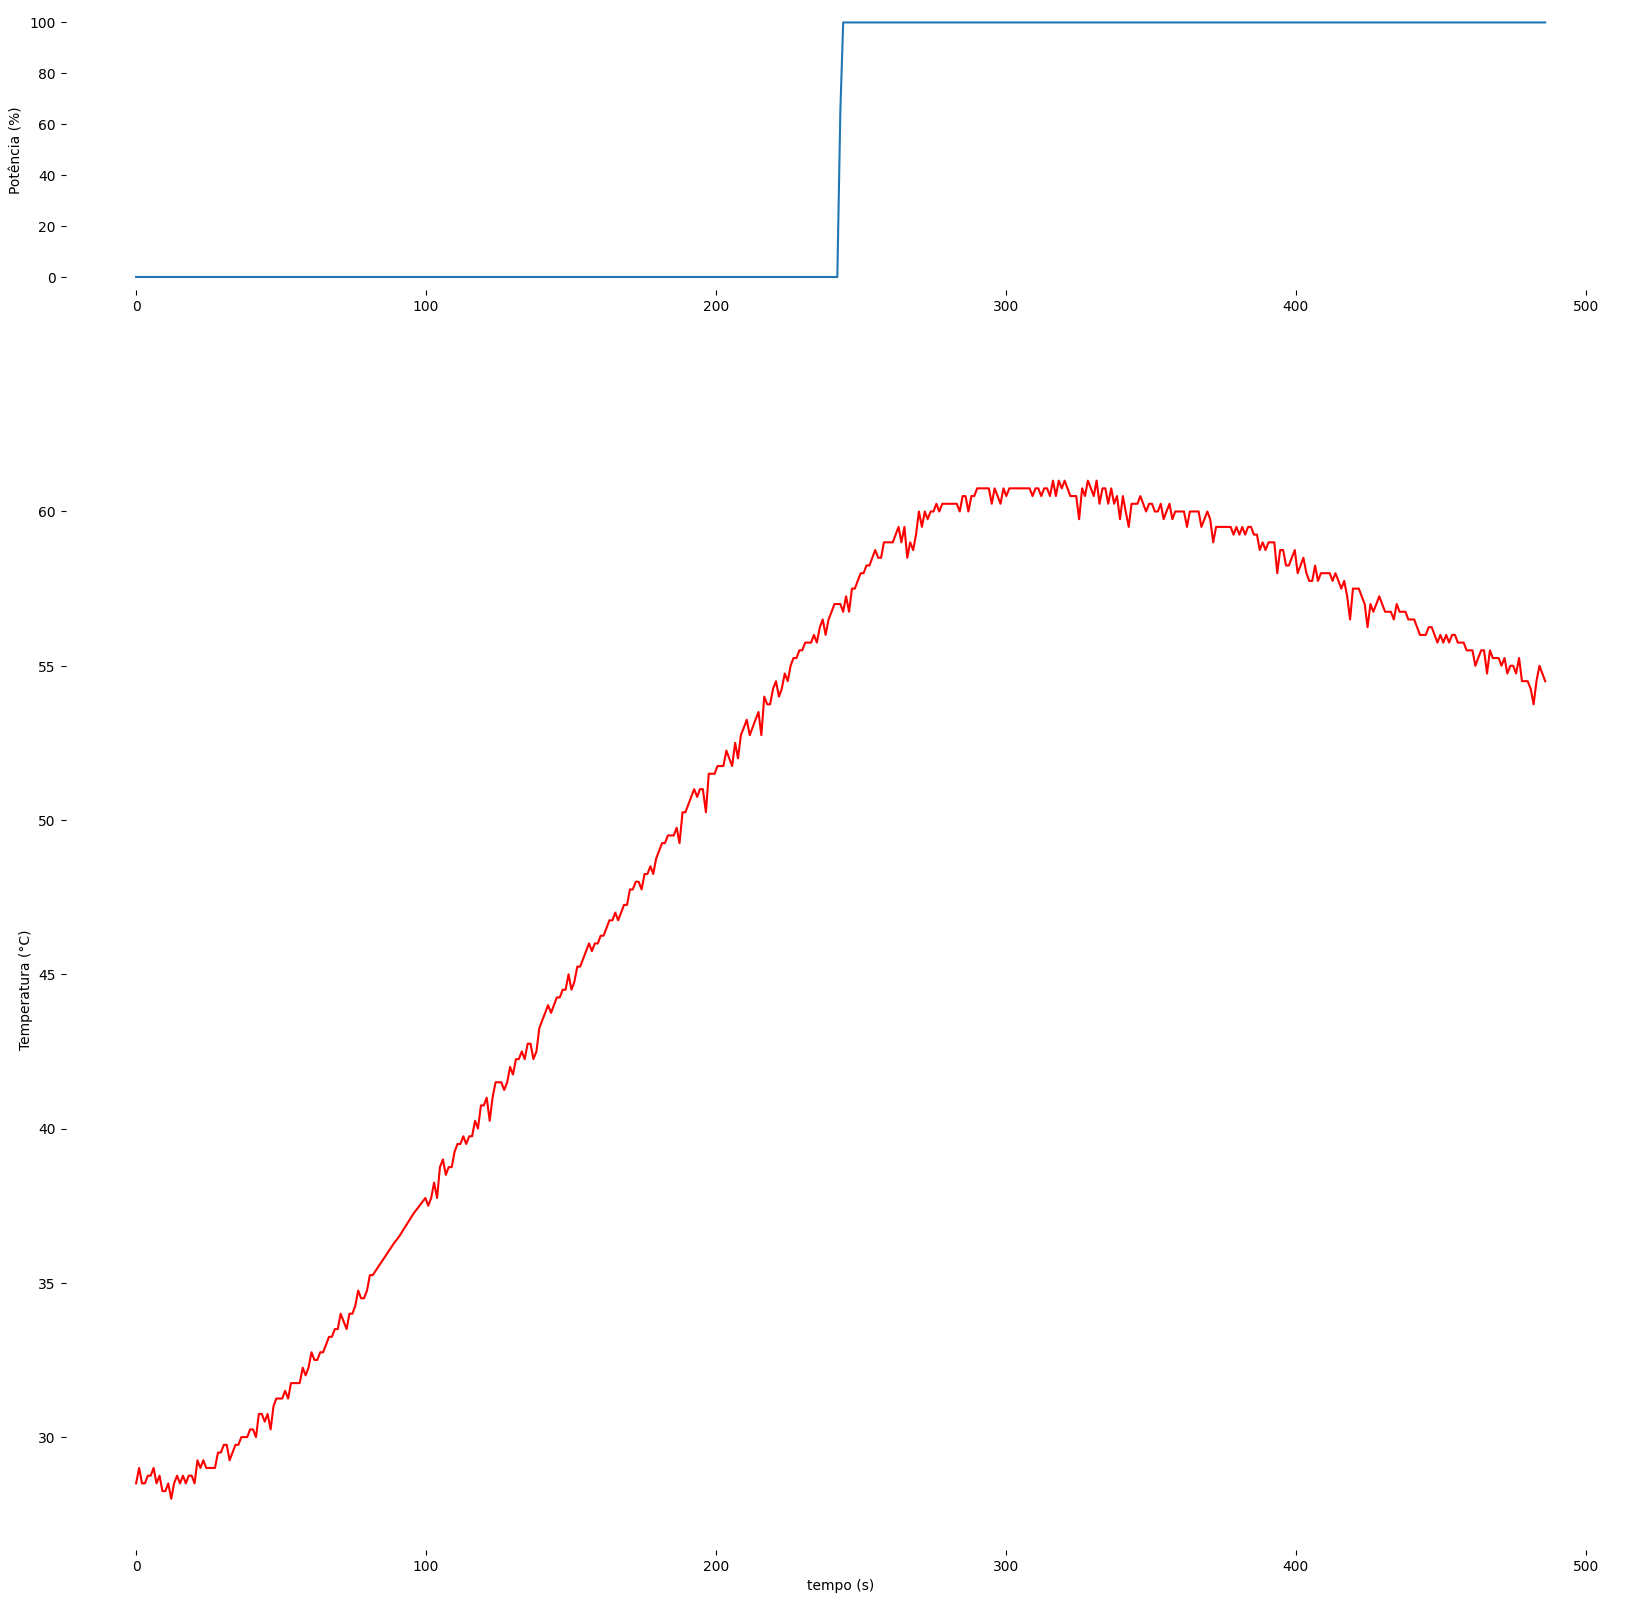

In [5]:
fig = plot(format(text))

In [ ]:
text = ''

STeste 2, 

## Teste 2, Termopar de Steve e do lab

In [ ]:
#include <RBDdimmer.h>
#include "max6675.h"

int thermoDO = 6;
int thermoCS = 7;
int thermoCLK = 8;

int tdo = 11;
int tcs = 10;
int tclk = 9;

dimmerLamp dimmer(12);
MAX6675 thermocouple(thermoCLK, thermoCS, thermoDO);
MAX6675 thermocouple_lab(tclk, tcs, tdo);

int outVal = 0;

void setup() {
  Serial.begin(9600);
  dimmer.begin(NORMAL_MODE, ON);
  delay(1000);
}

void loop() {
  outVal = map(analogRead(0), 0, 534, 0, 100);
  Serial.print(outVal); 
  Serial.print(" -- ");
  Serial.print(thermocouple.readCelsius());
  Serial.print(" -- ");
  Serial.println(thermocouple_lab.readCelsius());
  dimmer.setPower(outVal);
  delay(1000);
}

In [6]:
with open('teste2.txt','r') as f:
    text = f.read()

In [8]:
def plot(dados,name='dados.png'):
    import matplotlib.pyplot as plt
    from matplotlib import gridspec
    fig = plt.figure(figsize=(20, 20)) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4]) 
    plt.margins(0)
    ax0 = plt.subplot(gs[0])
    plt.box(False)
    ax0.plot(dados[:,0], dados[:,1])
    ax0.set_label('de')
    ax0.set_ylabel('Potência (%)')
    ax1 = plt.subplot(gs[1])
    plt.box(False)
    ax1.plot(dados[:,0], dados[:,2],'r')
    ax1.plot(dados[:,0], dados[:,3],'g')
    ax1.set_ylabel('Temperatura (°C)')
    ax1.set_xlabel('tempo (s)')
    fig.savefig(name,facecolor='white',bbox_inches='tight')
    return fig

In [ ]:
fig = plot(format(text))

Teste 3, mais tempo

teste 4, direto na rede

## Tentativa 1

In [10]:
a = [36,36,36,36,36,36,36,36,36,36,36,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,38,38,38,38,38,39,39,39,39,39,40,40,40,41,41,41,42,42,42,43,43,44,44,44,45,45,45,46,46,46,46,46,47,47,47,48,48,48,48,48,48,48,48,49,48,48,49,49,49,49,49,49,49,49,49,48,48,49,49,48,48,48,48,48,48,48,48,48,48,48]

In [11]:
for i in range(len(a)):
    a[i] = [i,a[i],0]

In [12]:
for i in range(len(a)):
    if i > 28 and i < 61:
        a[i][2] = 100
    else: a[i][2] = 53

In [13]:
import matplotlib.pyplot as plt, numpy as np
from matplotlib import gridspec

In [14]:
a = np.array(a)

Text(0.5, 0, 'tempo (s)')

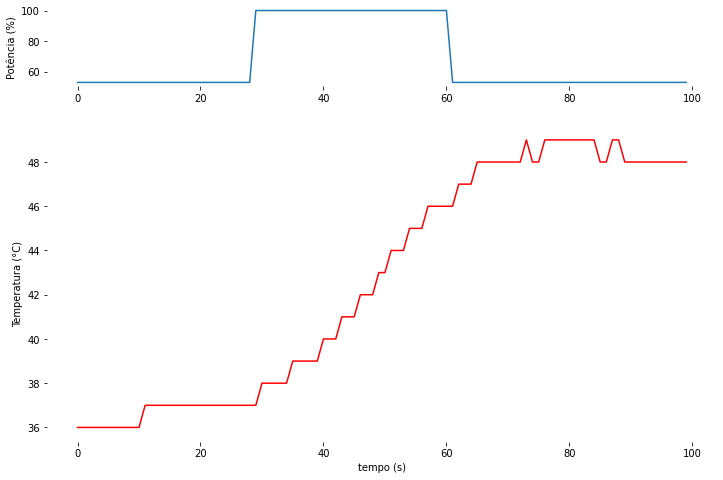

In [15]:
fig = plt.figure(figsize=(12, 8)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4]) 
ax0 = plt.subplot(gs[0])
plt.box(False)
ax0.plot(a[:,0], a[:,2])
ax0.set_label('de')
ax0.set_ylabel('Potência (%)')
ax1 = plt.subplot(gs[1])
plt.box(False)
ax1.plot(a[:,0], a[:,1],'r')
ax1.set_ylabel('Temperatura (°C)')
ax1.set_xlabel('tempo (s)')

In [16]:
fig.savefig('dimmer.png')

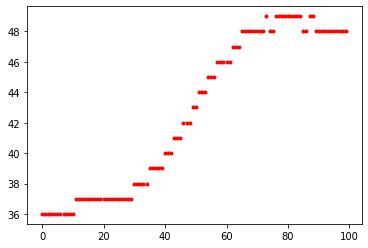

In [12]:
plt.plot(a[:,0],a[:,1],'r.')